In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx


In [1]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.6.1


In [2]:
import warnings 
warnings.filterwarnings("ignore")
df = pd.read_excel("/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx", sheet_name=1)

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3545,53546,0,11.0,Mobile Phone,1,7.0,Debit Card,Female,3.0,5,Laptop & Accessory,2,Divorced,3,0,14.0,4.0,4.0,12.0,189.74
4648,54649,0,16.0,Mobile Phone,1,9.0,Debit Card,Female,3.0,4,Laptop & Accessory,1,Married,3,0,14.0,1.0,3.0,3.0,165.89
1323,51324,0,14.0,Mobile Phone,3,9.0,Debit Card,Male,2.0,4,Laptop & Accessory,4,Married,3,0,11.0,0.0,1.0,4.0,189.38
5460,55461,0,8.0,Mobile Phone,3,15.0,Cash on Delivery,Male,4.0,2,Laptop & Accessory,3,Married,3,0,22.0,3.0,5.0,9.0,192.99
839,50840,0,7.0,Mobile Phone,3,21.0,Credit Card,Female,3.0,3,Laptop & Accessory,5,Single,2,0,12.0,1.0,9.0,6.0,161.25


In [4]:
#remove the customer id column
df.drop(columns=["CustomerID"],inplace=True)

In [5]:
#renaming the columns
df.rename(
    columns={
        "PreferredLoginDevice":"Device",
        "PreferredPaymentMode":"PaymentMode",
    },
    inplace=True,
)

In [6]:
df

,Churn,Tenure,Device,CityTier,WarehouseToHome,PaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [7]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   Device                       5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PaymentMode                  5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [8]:
#convert objects into category data type
categorical_columns=df.select_dtypes("object").columns
df[categorical_columns]=df[categorical_columns].astype("category")
df["Complain"]=df["Complain"].astype("category")
df["Churn"]=df["Churn"].astype("category")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Churn                        5630 non-null   category
 1   Tenure                       5366 non-null   float64 
 2   Device                       5630 non-null   category
 3   CityTier                     5630 non-null   int64   
 4   WarehouseToHome              5379 non-null   float64 
 5   PaymentMode                  5630 non-null   category
 6   Gender                       5630 non-null   category
 7   HourSpendOnApp               5375 non-null   float64 
 8   NumberOfDeviceRegistered     5630 non-null   int64   
 9   PreferedOrderCat             5630 non-null   category
 10  SatisfactionScore            5630 non-null   int64   
 11  MaritalStatus                5630 non-null   category
 12  NumberOfAddress              5630 non-null   int64   
 13  Com

In [10]:
#is there any null values
df.isnull().sum()

Churn                            0
Tenure                         264
Device                           0
CityTier                         0
WarehouseToHome                251
PaymentMode                      0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

**Tenure,WarehouseToHome,HoursSpentOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder**                

In [11]:
df.select_dtypes(include=["int64","float64"]).describe()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,15.707922,1.751023,3.008004,4.543491,177.223030
std,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000


# Performing EDA

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
numerical_columns=df.select_dtypes(include=["int64","float64"]).columns
numerical_columns=numerical_columns[1:]
categorical_columns=df.select_dtypes(include=["category"]).columns

# Numerical 

[]

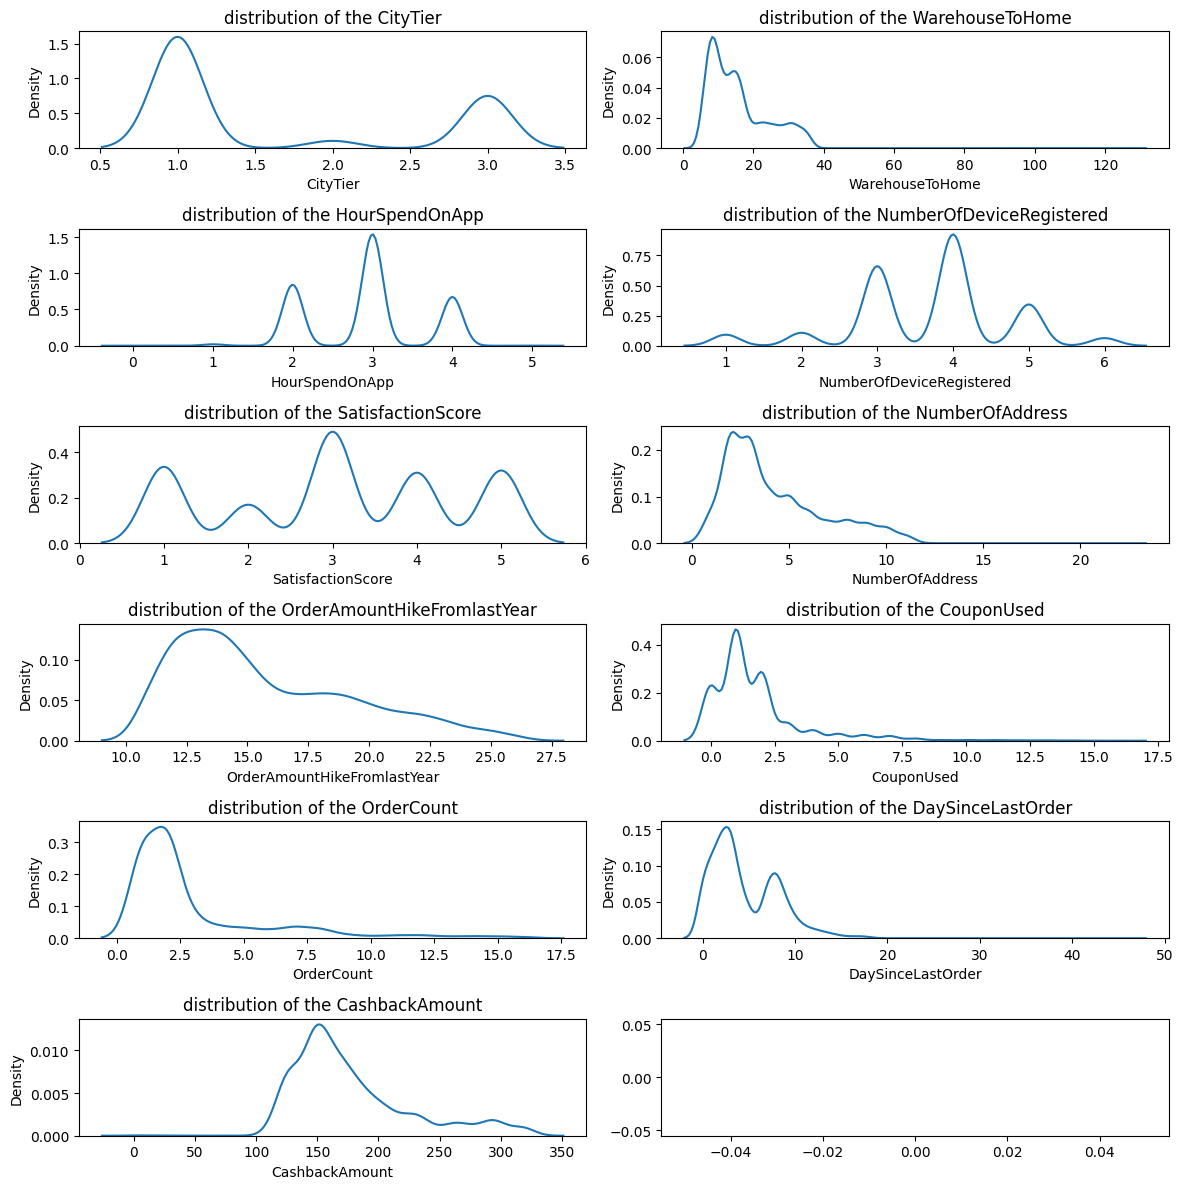

In [15]:
fig,ax=plt.subplots(6,2,figsize=(12,12))
for i,column in enumerate(numerical_columns):
    row=i//2
    col=i%2
    sns.kdeplot(data=df,x=df[column],ax=ax[row,col])
    ax[row,col].set_title("distribution of the {}".format(column))
    ax[row,col].set_xlabel("{}".format(column))
plt.tight_layout()
plt.plot()

[]

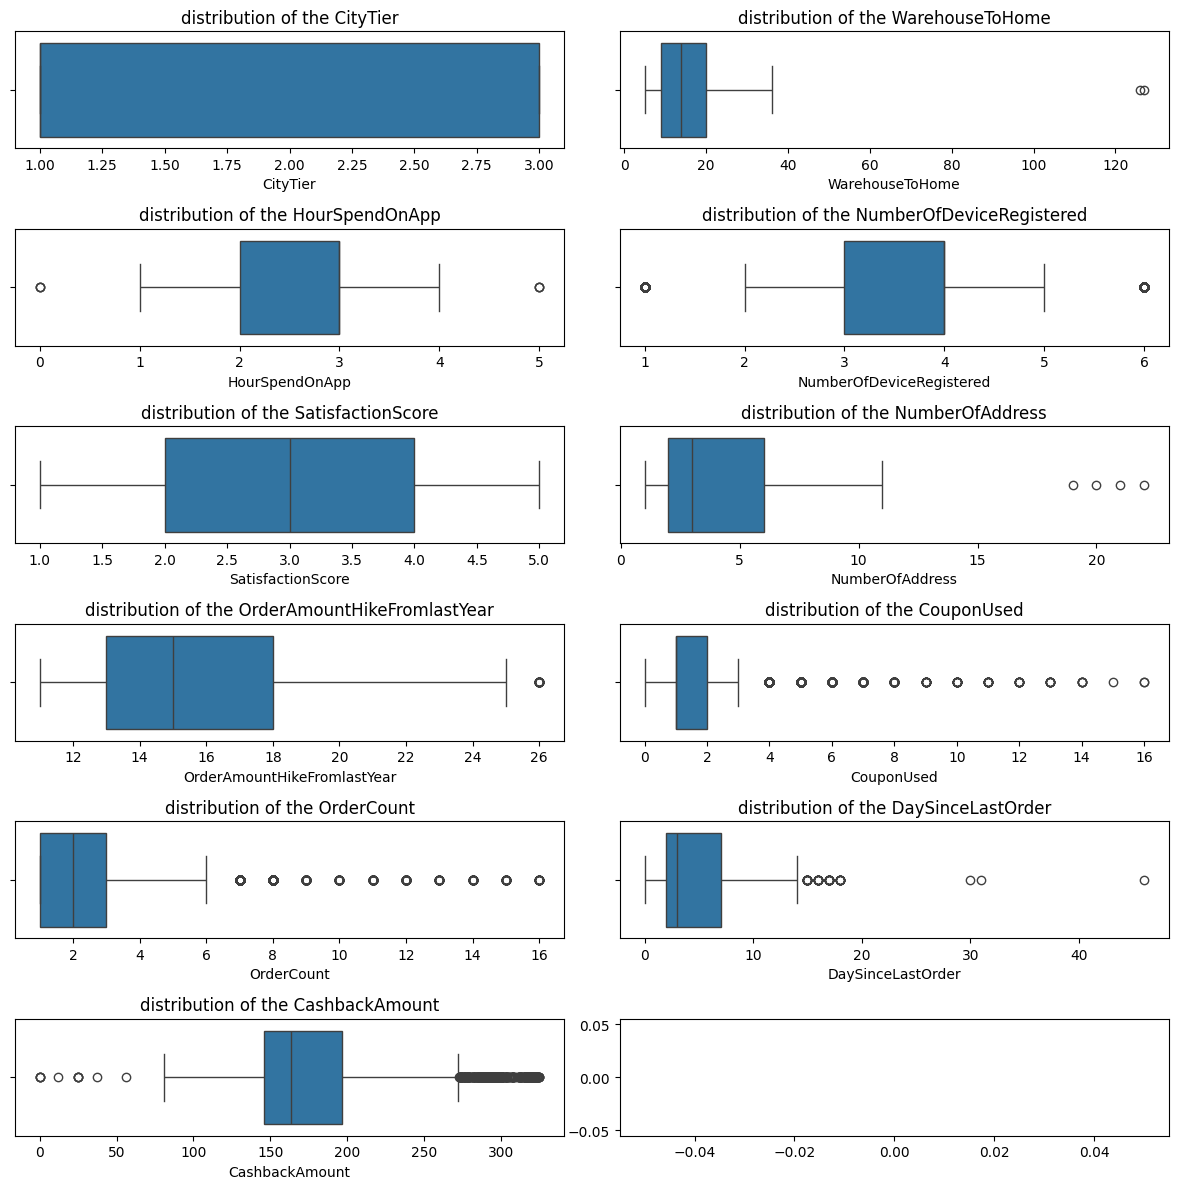

In [16]:
fig,ax=plt.subplots(6,2,figsize=(12,12))
for i,column in enumerate(numerical_columns):
    row=i//2
    col=i%2
    sns.boxplot(data=df,x=df[column],ax=ax[row,col])
    ax[row,col].set_title("distribution of the {}".format(column))
    ax[row,col].set_xlabel("{}".format(column))
plt.tight_layout()
plt.plot()

In [17]:
discrete_columns=df.select_dtypes("int64").columns
discrete_columns=discrete_columns[1:]

In [18]:
len(discrete_columns)

3

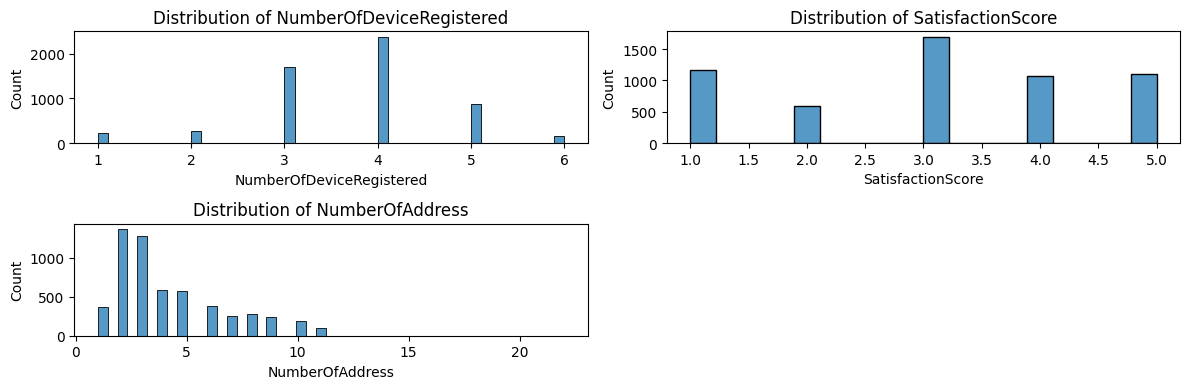

In [19]:

n_cols = len(discrete_columns)
n_rows = (n_cols + 1) // 2
fig, ax = plt.subplots(n_rows, 2, figsize=(12, 2*n_rows))
ax = ax.flatten()  

for i, column in enumerate(discrete_columns):
    sns.histplot(data=df, x=column, ax=ax[i])
    ax[i].set_title(f"Distribution of {column}")
    ax[i].set_xlabel(column)

for i in range(n_cols, len(ax)):
    ax[i].remove()
plt.tight_layout()
plt.show()

# Bivariate Analysis

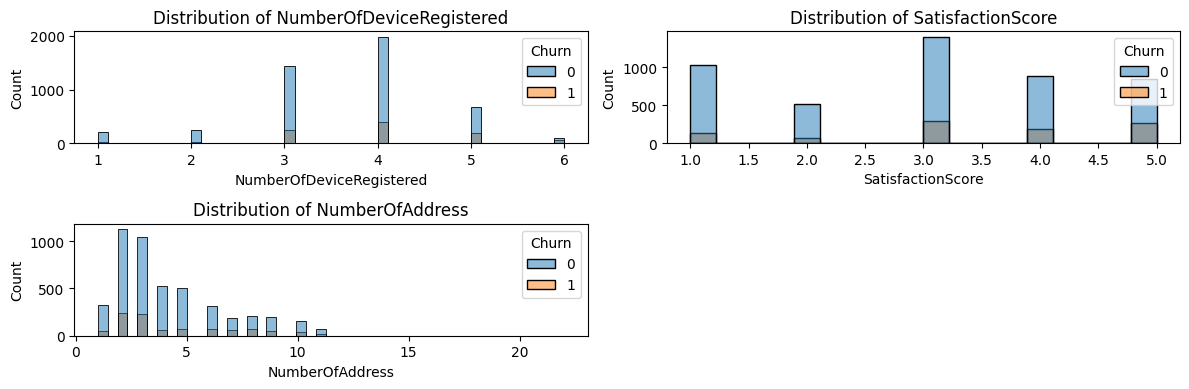

In [20]:

n_cols = len(discrete_columns)
n_rows = (n_cols + 1) // 2
fig, ax = plt.subplots(n_rows, 2, figsize=(12, 2*n_rows))
ax = ax.flatten()  

for i, column in enumerate(discrete_columns):
    sns.histplot(data=df, x=column,hue="Churn", ax=ax[i])
    ax[i].set_title(f"Distribution of {column}")
    ax[i].set_xlabel(column)

for i in range(n_cols, len(ax)):
    ax[i].remove()
plt.tight_layout()
plt.show()

[]

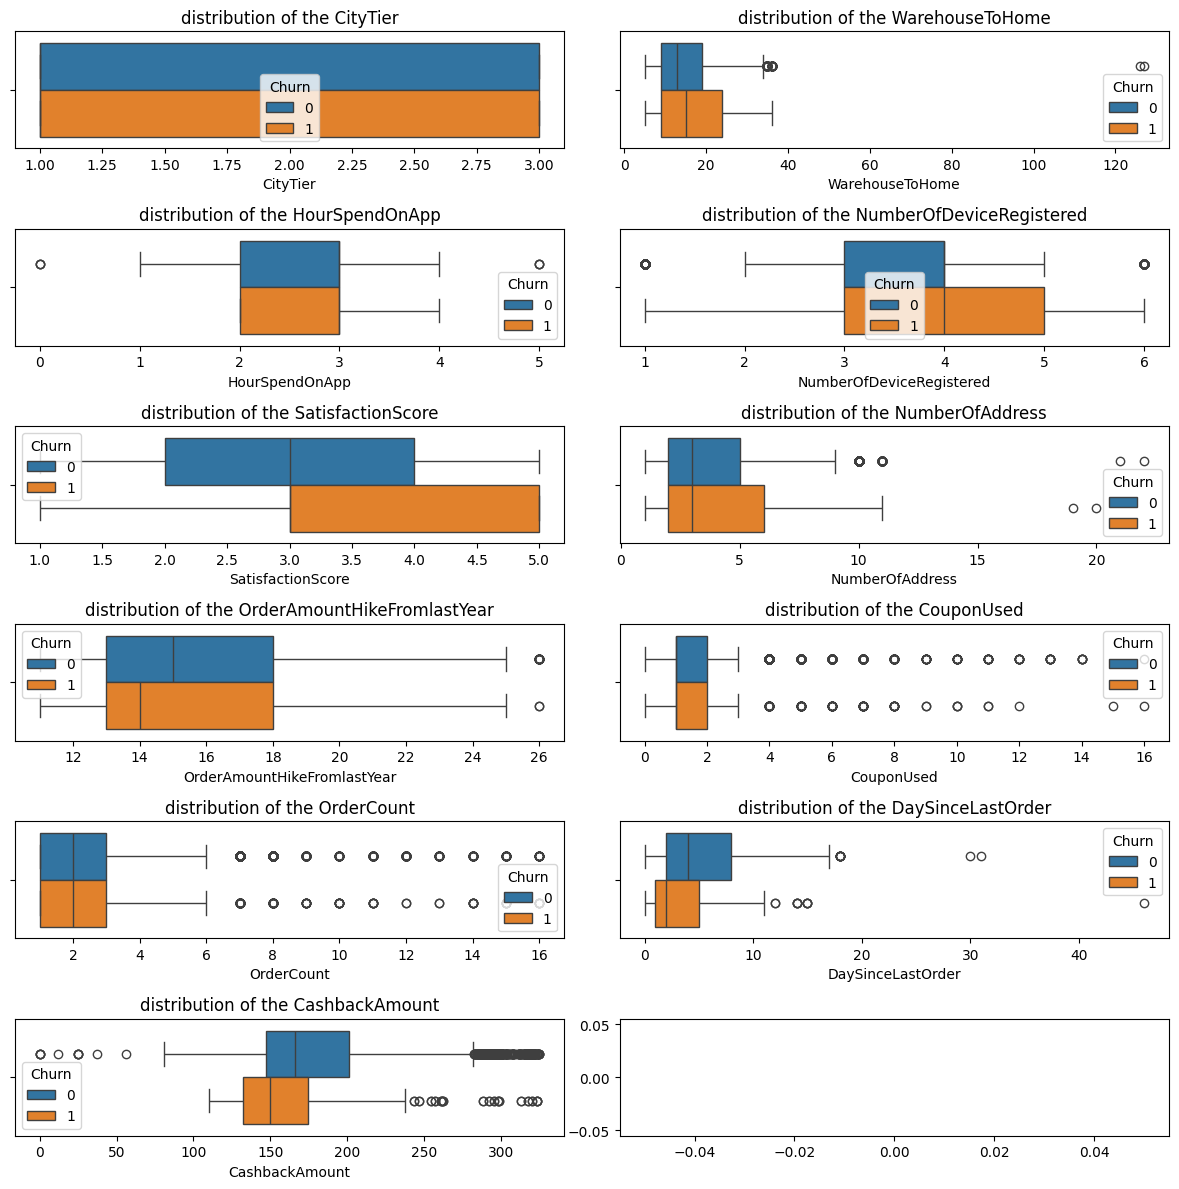

In [21]:
fig,ax=plt.subplots(6,2,figsize=(12,12))
for i,column in enumerate(numerical_columns):
    row=i//2
    col=i%2
    sns.boxplot(data=df,x=df[column],hue="Churn",ax=ax[row,col])
    ax[row,col].set_title("distribution of the {}".format(column))
    ax[row,col].set_xlabel("{}".format(column))
plt.tight_layout()
plt.plot()

[]

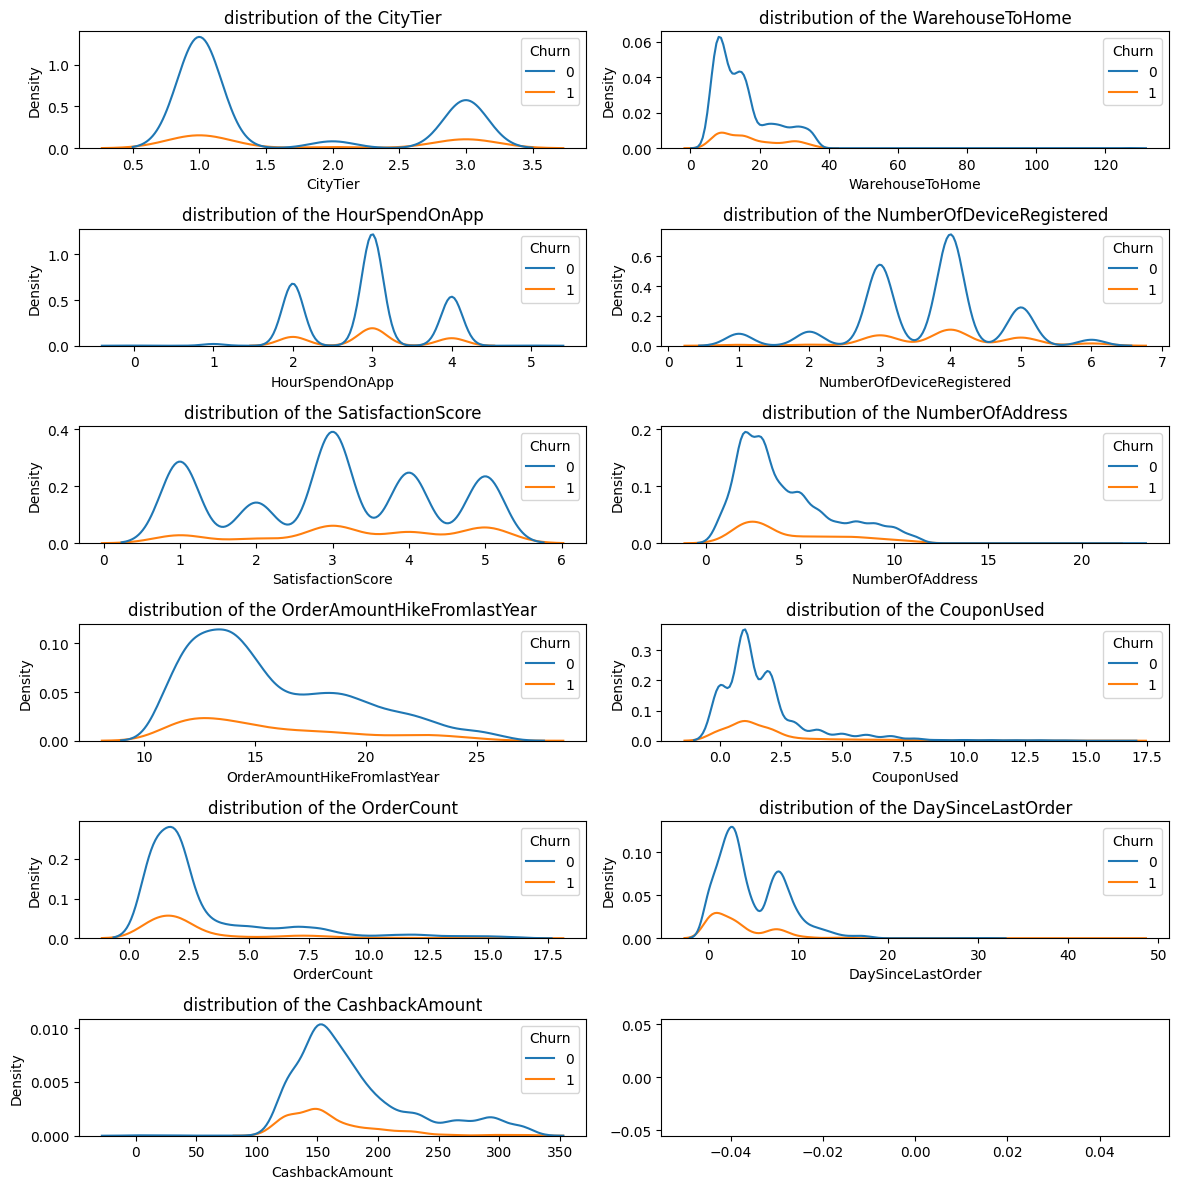

In [22]:
fig,ax=plt.subplots(6,2,figsize=(12,12))
for i,column in enumerate(numerical_columns):
    row=i//2
    col=i%2
    sns.kdeplot(data=df,x=df[column],hue="Churn",ax=ax[row,col])
    ax[row,col].set_title("distribution of the {}".format(column))
    ax[row,col].set_xlabel("{}".format(column))
plt.tight_layout()
plt.plot()

# Correlation Analysis

<Axes: >

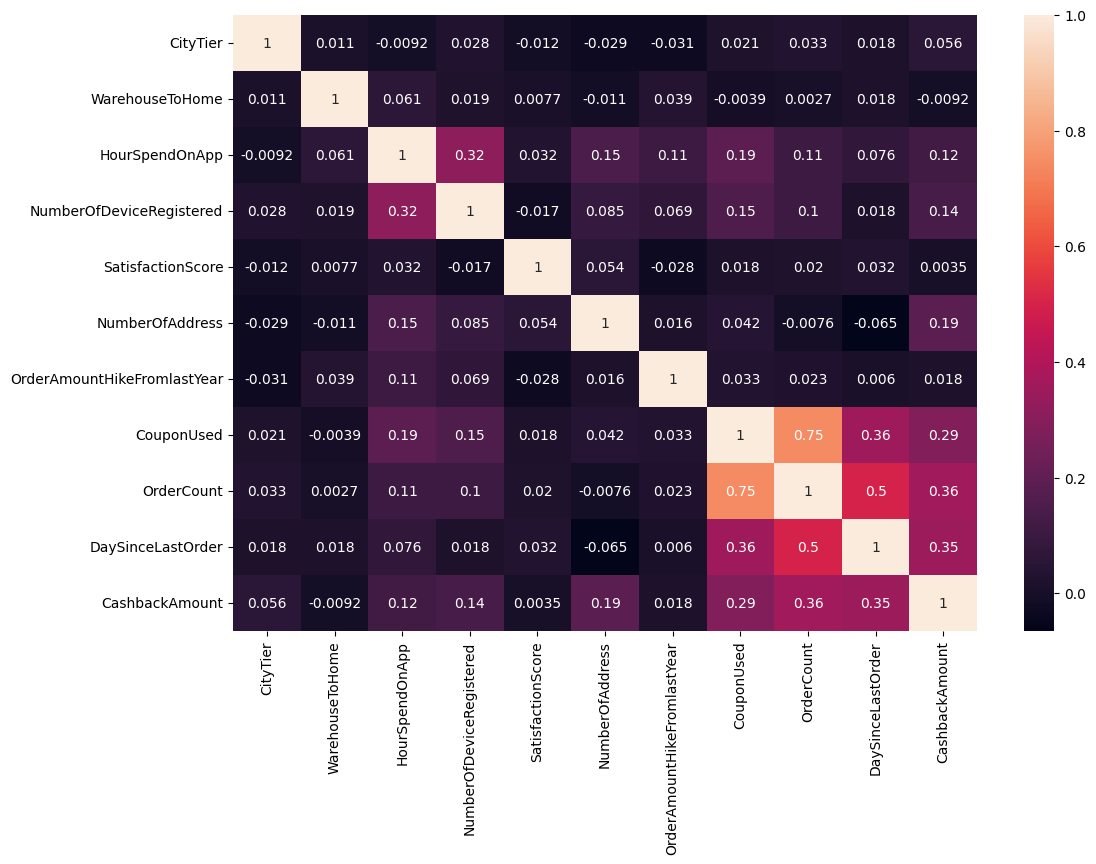

In [23]:
plt.figure(figsize=(12,8))
correlation=df[numerical_columns].corr()
sns.heatmap(correlation,annot=True)

# Categorical features

In [24]:
len(categorical_columns)

7

[]

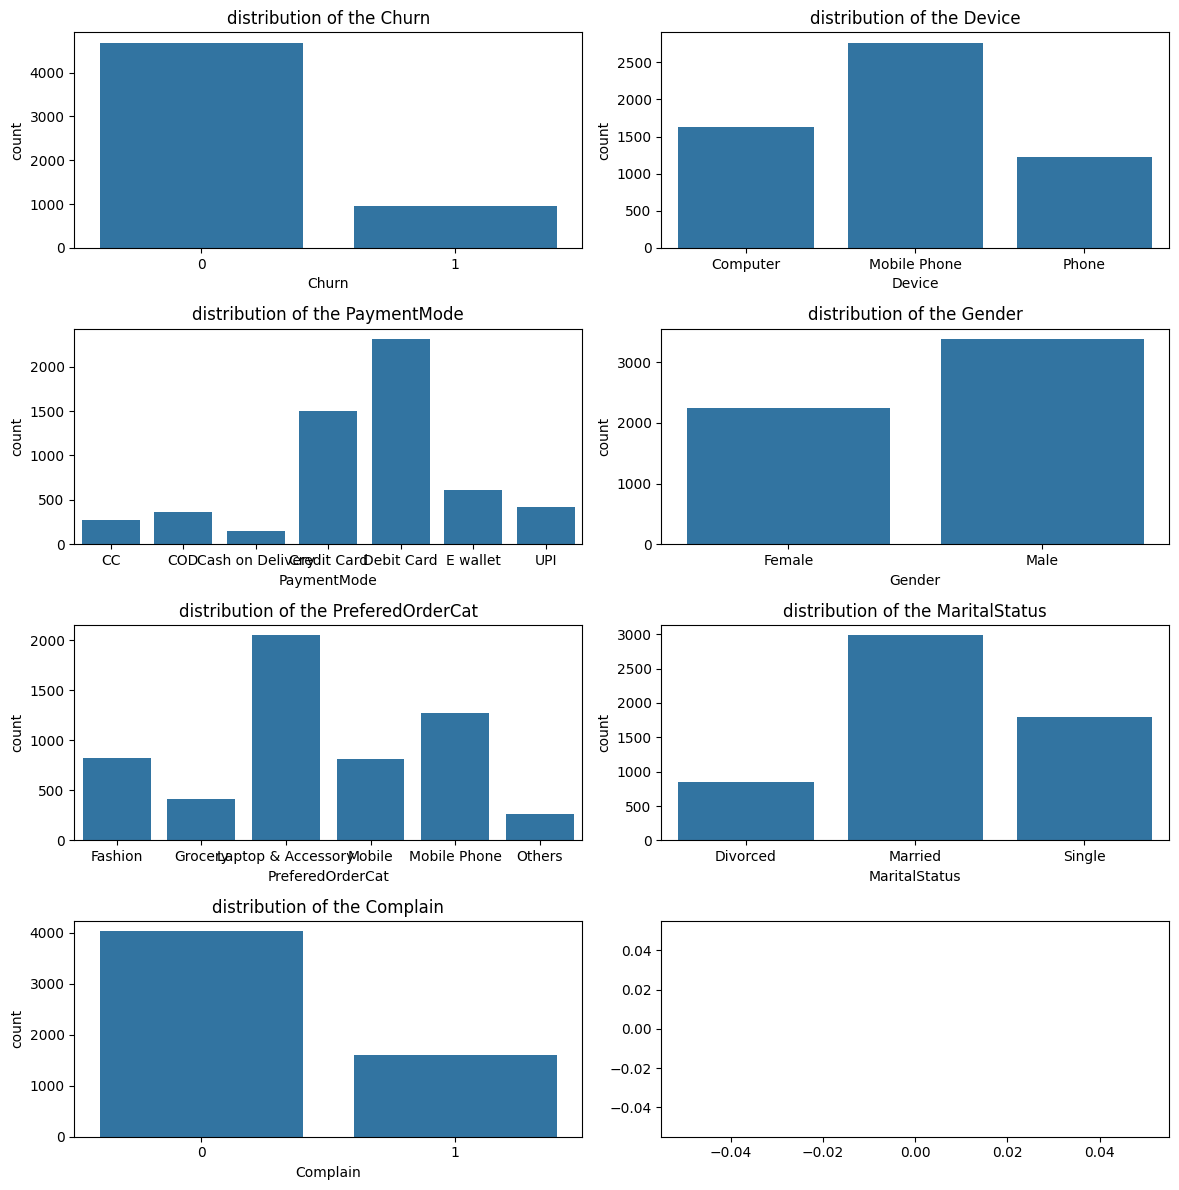

In [149]:
fig,ax=plt.subplots(4,2,figsize=(12,12))
for i,column in enumerate(categorical_columns):
    row=i//2
    col=i%2
    sns.countplot(data=df,x=df[column],ax=ax[row,col])
    ax[row,col].set_title("distribution of the {}".format(column))
    ax[row,col].set_xlabel("{}".format(column))
plt.tight_layout()
plt.plot()

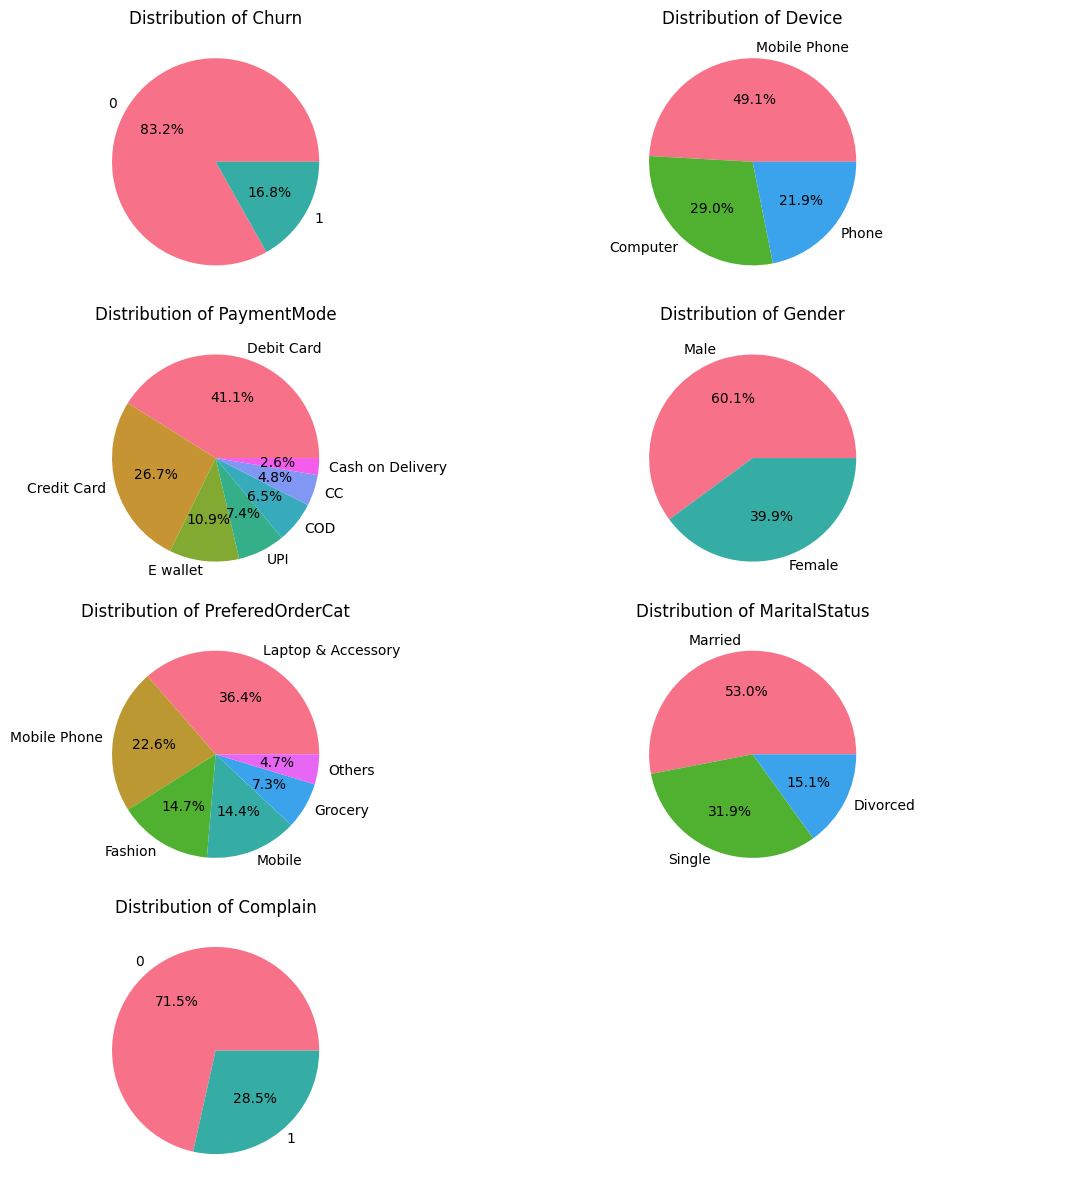

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4, 2, figsize=(12, 12))
for i, column in enumerate(categorical_columns):
    row = i // 2
    col = i % 2
    value_counts = df[column].value_counts()
    colors = sns.color_palette("husl", len(value_counts))
    ax[row, col].pie(value_counts.values, labels=value_counts.index, 
                     colors=colors, autopct='%1.1f%%')
    ax[row, col].set_title(f"Distribution of {column}")

# Hide unused subplots (those beyond len(categorical_columns))
for i in range(len(categorical_columns), 8):
    row = i // 2
    col = i % 2
    ax[row, col].axis('off')

plt.tight_layout()
plt.show()


[]

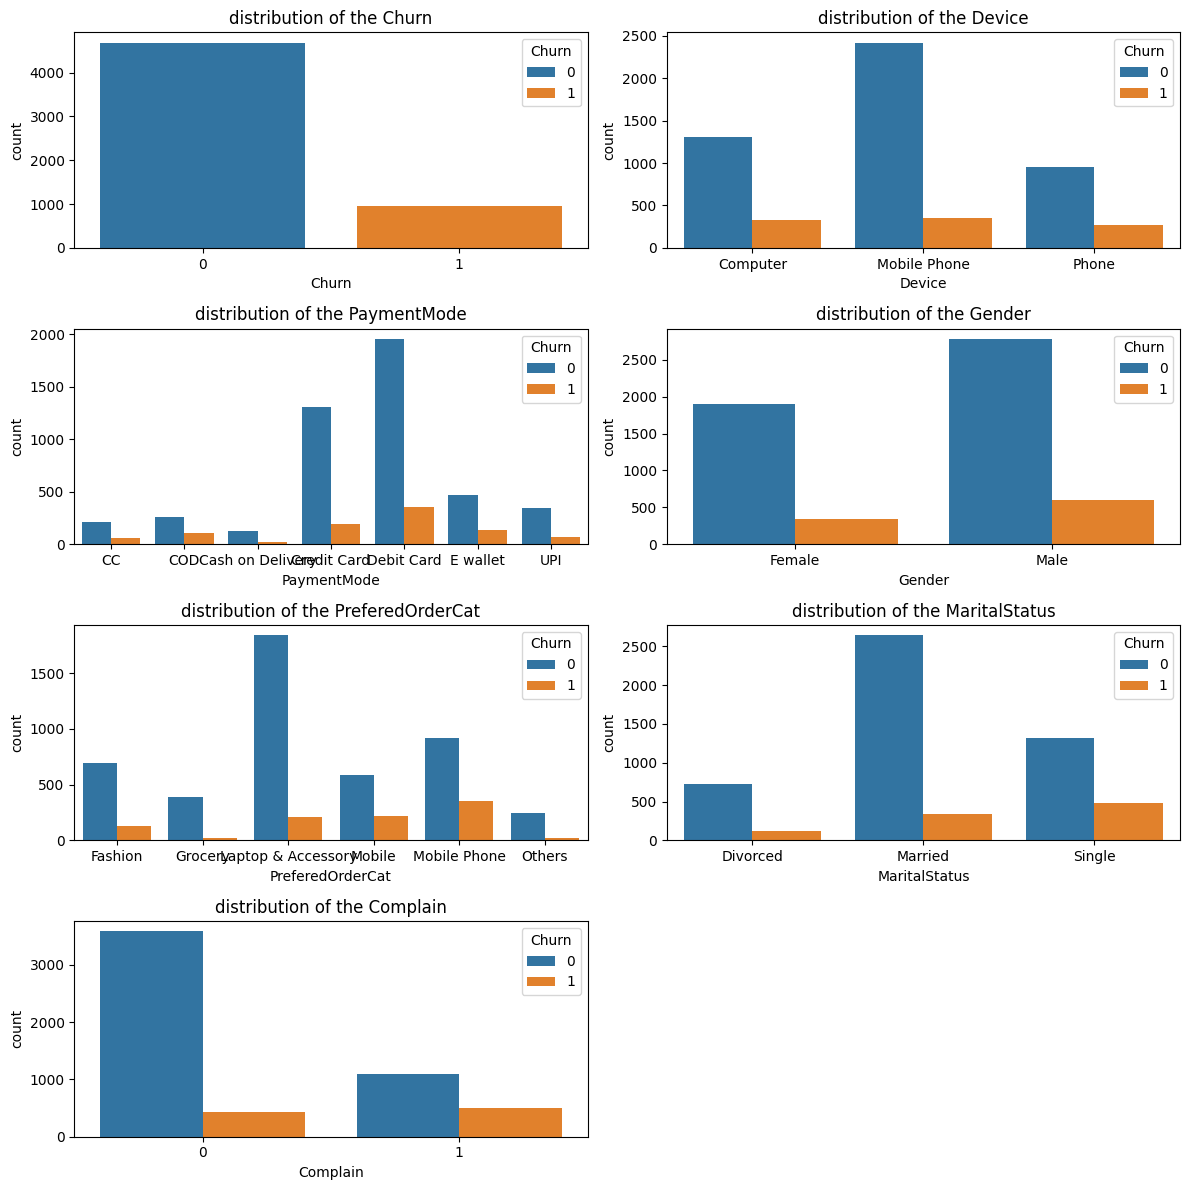

In [26]:
fig,ax=plt.subplots(4,2,figsize=(12,12))
for i,column in enumerate(categorical_columns):
    row=i//2
    col=i%2
    sns.countplot(data=df,x=df[column],hue="Churn",ax=ax[row,col])
    ax[row,col].set_title("distribution of the {}".format(column))
    ax[row,col].set_xlabel("{}".format(column))
# Hide unused subplots (those beyond len(categorical_columns))
for i in range(len(categorical_columns), 8):
    row = i // 2
    col = i % 2
    ax[row, col].axis('off')
plt.tight_layout()
plt.plot()

# Preprocessing Pipeline

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    df.drop(columns="Churn"),
    df["Churn"],
    test_size=0.2,
    random_state=42,
)

In [16]:
X_train.shape

(4504, 18)

In [17]:
X_test.shape

(1126, 18)

In [18]:
y_train.shape

(4504,)

In [19]:
y_test.shape

(1126,)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ("transform",PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns[1:])#remove the Churn column from the categorical columns
    ])

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,ConfusionMatrixDisplay

def train_test_model(model, preprocessor,X_train, y_train, X_test, y_test):
    model_pipeline = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model_training", model),
        ]
    )
    
    # Fit the pipeline
    model_pipeline.fit(X_train, y_train)
    
    # Predict on test set
    y_test_pred = model_pipeline.predict(X_test)
    y_train_pred=model_pipeline.predict(X_train)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Detailed classification report
    report = classification_report(y_test, y_test_pred)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    results = {
        "model": model_pipeline,
        "train_accuracy": accuracy_score(y_train, y_train_pred),
        "test_accuracy": accuracy_score(y_test, y_test_pred),
        "train_f1": f1_score(y_train, y_train_pred, average="weighted"),
        "test_f1": f1_score(y_test, y_test_pred, average="weighted"),
        "classification_report": classification_report(y_test, y_test_pred),
        "confusion_matrix": confusion_matrix(y_test, y_test_pred),
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", cm)
    return results

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_train_test_metrics(results):
    metrics = ["Accuracy", "F1 Score"]
    train_scores = [results["train_accuracy"], results["train_f1"]]
    test_scores = [results["test_accuracy"], results["test_f1"]]

    x = np.arange(len(metrics))
    width = 0.35

    plt.figure(figsize=(6, 4))
    plt.bar(x - width/2, train_scores, width, label="Train")
    plt.bar(x + width/2, test_scores, width, label="Test")

    plt.xticks(x, metrics)
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.title("Train vs Test Performance")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


In [23]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model_pipeline, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model_pipeline,
        X,
        y,
        cv=5,
        scoring="f1_weighted",
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    plt.figure(figsize=(7, 5))
    plt.plot(train_sizes, train_mean, marker="o", label="Training Score")
    plt.plot(train_sizes, test_mean, marker="o", label="Validation Score")

    plt.xlabel("Training Set Size")
    plt.ylabel("F1 Score")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


In [24]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model_pipeline, X_test, y_test):
    y_prob = model_pipeline.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(results):
    disp = ConfusionMatrixDisplay(confusion_matrix=results["confusion_matrix"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix (Test Set)")
    plt.show()


# Logistic Regression

Accuracy: 0.7869
F1-Score: 0.8098

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86       941
           1       0.42      0.81      0.56       185

    accuracy                           0.79      1126
   macro avg       0.69      0.80      0.71      1126
weighted avg       0.87      0.79      0.81      1126


Confusion Matrix:
 [[736 205]
 [ 35 150]]


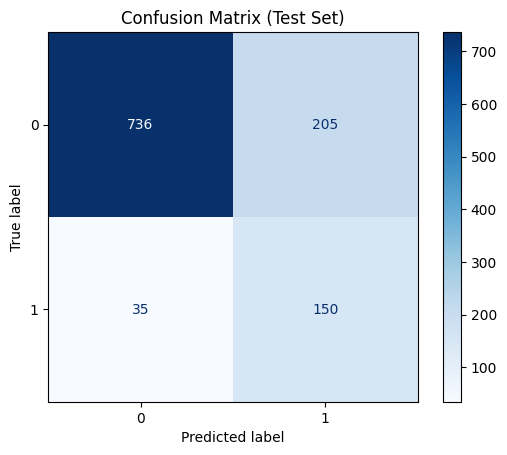

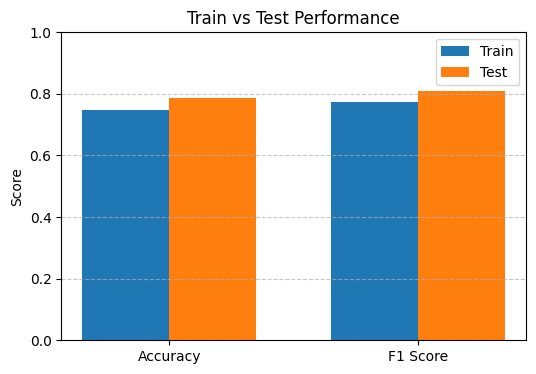

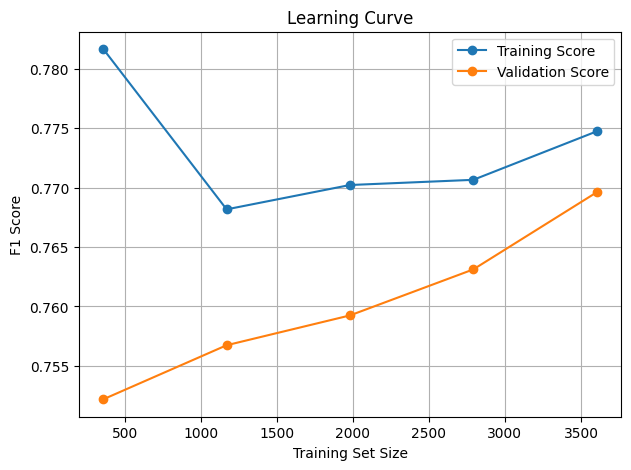

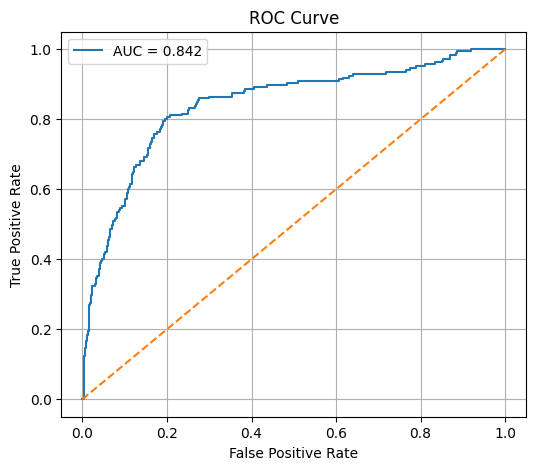

In [38]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(class_weight="balanced")
results = train_test_model(
    logistic,
    preprocessor,
    X_train,
    y_train,
    X_test,
    y_test
)

plot_confusion_matrix(results)
plot_train_test_metrics(results)
plot_learning_curve(results["model"], X_train, y_train)
# If binary classification
plot_roc_curve(results["model"], X_test, y_test)


# Support Vector Machines

Accuracy: 0.8899
F1-Score: 0.8712

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       941
           1       0.88      0.38      0.53       185

    accuracy                           0.89      1126
   macro avg       0.88      0.69      0.74      1126
weighted avg       0.89      0.89      0.87      1126


Confusion Matrix:
 [[931  10]
 [114  71]]


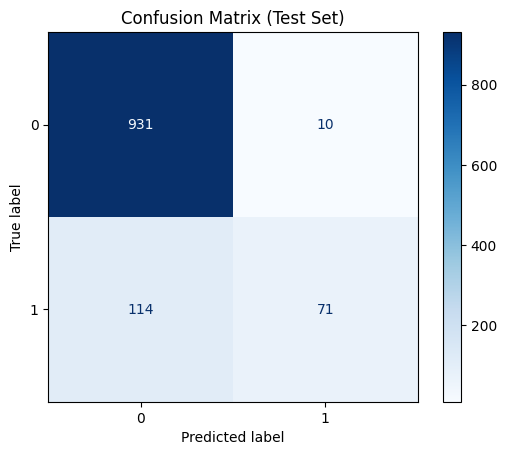

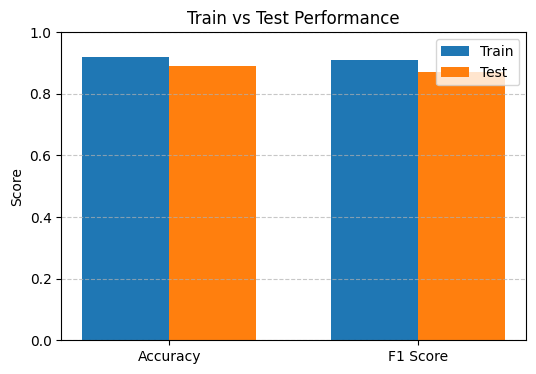

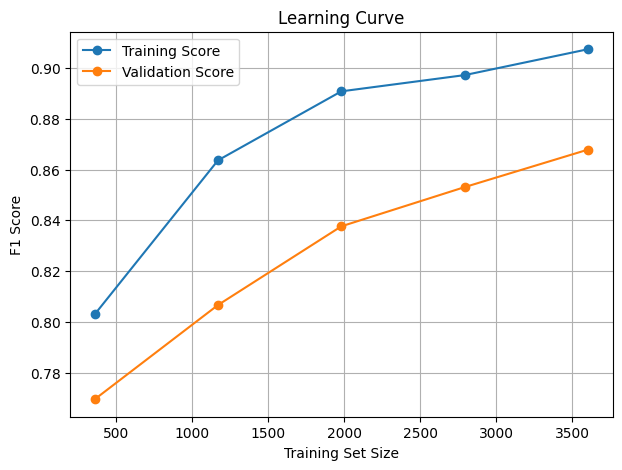

In [39]:
from sklearn import svm
svc=svm.SVC(kernel="rbf")
results = train_test_model(
    svc,
    preprocessor,
    X_train,
    y_train,
    X_test,
    y_test
)

plot_confusion_matrix(results)
plot_train_test_metrics(results)
plot_learning_curve(results["model"], X_train, y_train)


# kNearest Neighbours

Accuracy: 0.9041
F1-Score: 0.8966

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       941
           1       0.80      0.55      0.65       185

    accuracy                           0.90      1126
   macro avg       0.86      0.76      0.80      1126
weighted avg       0.90      0.90      0.90      1126


Confusion Matrix:
 [[916  25]
 [ 83 102]]


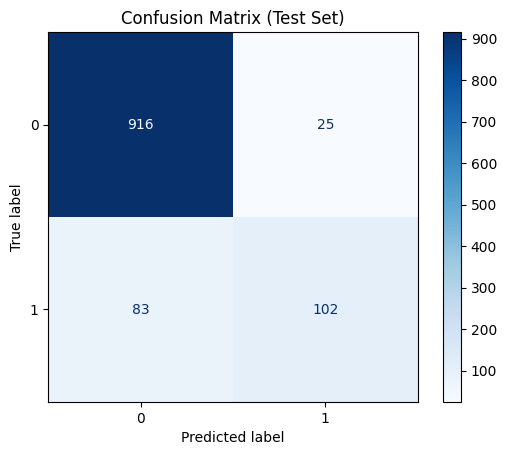

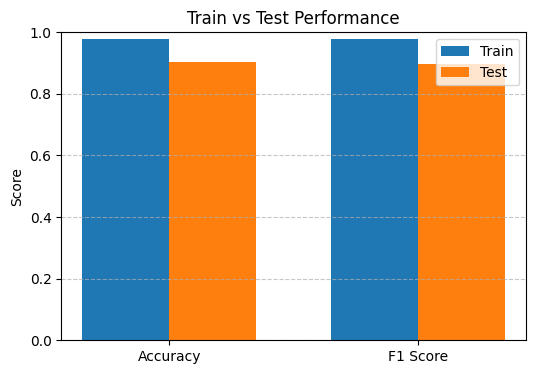

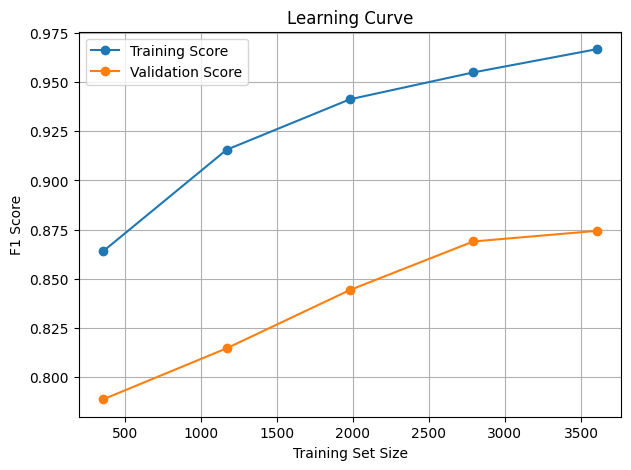

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
results = train_test_model(
    knn,
    preprocessor,
    X_train,
    y_train,
    X_test,
    y_test
)

plot_confusion_matrix(results)
plot_train_test_metrics(results)
plot_learning_curve(results["model"], X_train, y_train)

# Random Forest Classifier

Accuracy: 0.9503
F1-Score: 0.9470

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       941
           1       0.98      0.71      0.82       185

    accuracy                           0.95      1126
   macro avg       0.96      0.86      0.90      1126
weighted avg       0.95      0.95      0.95      1126


Confusion Matrix:
 [[938   3]
 [ 53 132]]


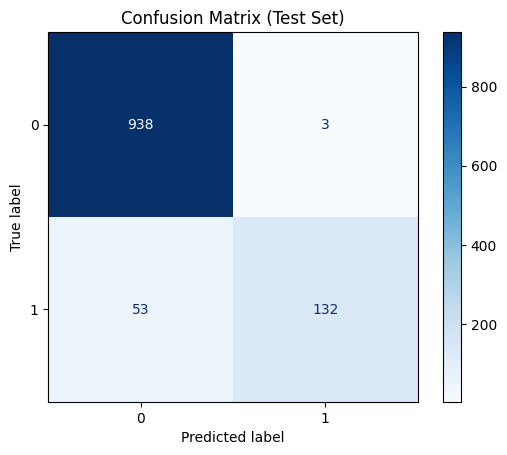

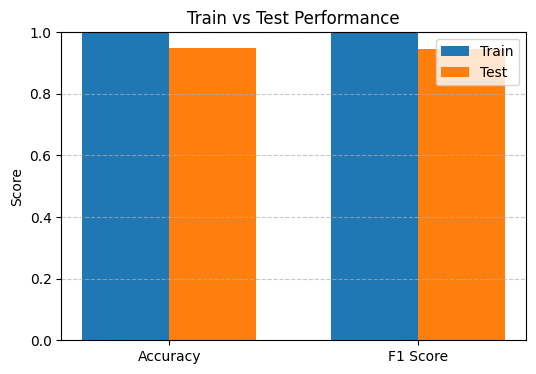

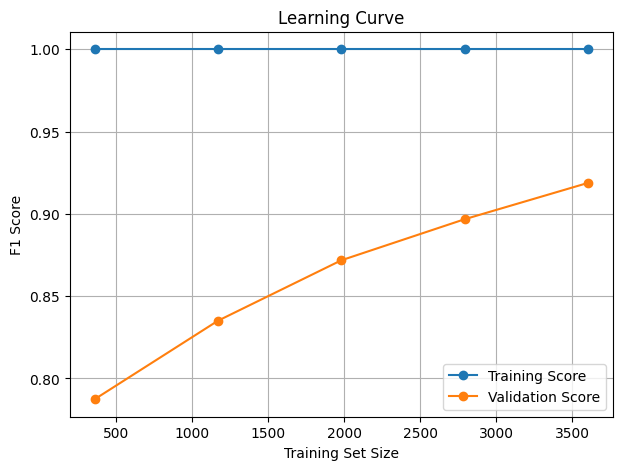

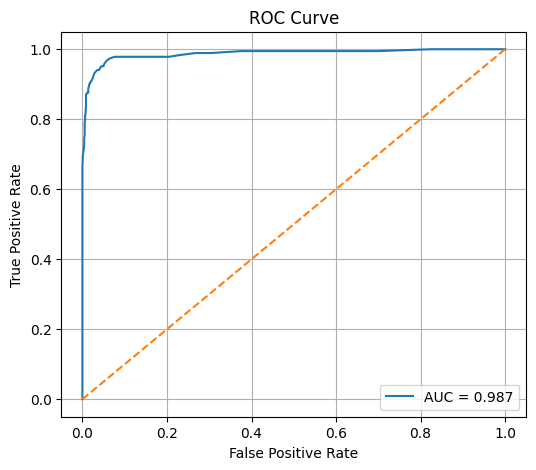

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
results = train_test_model(
    rf_model,
    preprocessor,
    X_train,
    y_train,
    X_test,
    y_test
)

plot_confusion_matrix(results)
plot_train_test_metrics(results)
plot_learning_curve(results["model"], X_train, y_train)
# If binary classification
plot_roc_curve(results["model"], X_test, y_test)

# Hyper Parameter Tunining

In [48]:
from sklearn.model_selection import GridSearchCV
model_pipeline=Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("model",RandomForestClassifier(random_state=42,class_weight='balanced'))
    ]
)

In [49]:
param_grid = {
    "model__n_estimators": [200, 300, 500],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 3, 5],
    "model__max_features": ["sqrt", "log2", None]
}
grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring='f1_weighted',  
    cv=5,                   
    n_jobs=-1,
    verbose=2
)


In [50]:
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV F1-Score:", grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   1.5s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300; total time=   2.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300; total time=   2.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500; total time=   3.8s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   1.5s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=300; total time=  

In [51]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.9662522202486679
Test F1-Score: 0.9650281052989133

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       941
           1       0.97      0.82      0.89       185

    accuracy                           0.97      1126
   macro avg       0.97      0.91      0.93      1126
weighted avg       0.97      0.97      0.97      1126


Confusion Matrix:
 [[937   4]
 [ 34 151]]


# Best Random Forest model

In [52]:
#{'model__max_depth': None, 'model__max_features': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300}

Accuracy: 0.9663
F1-Score: 0.9650

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       941
           1       0.97      0.82      0.89       185

    accuracy                           0.97      1126
   macro avg       0.97      0.91      0.93      1126
weighted avg       0.97      0.97      0.97      1126


Confusion Matrix:
 [[937   4]
 [ 34 151]]


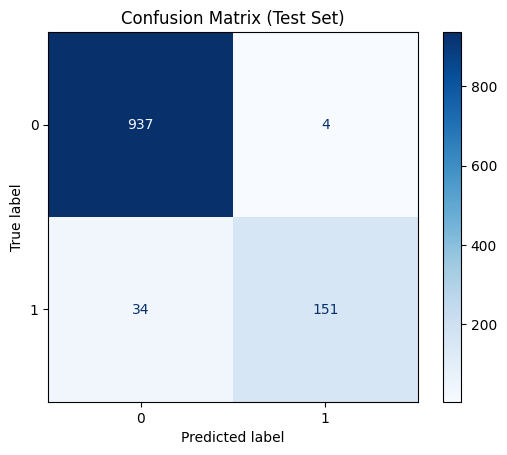

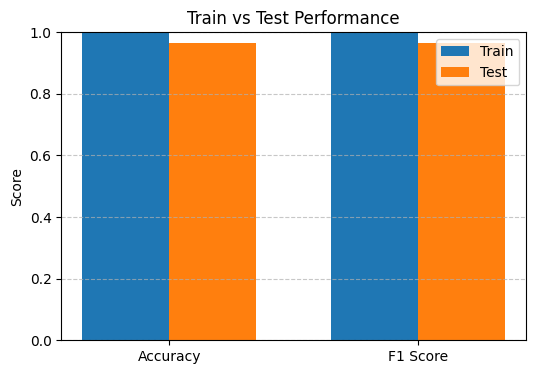

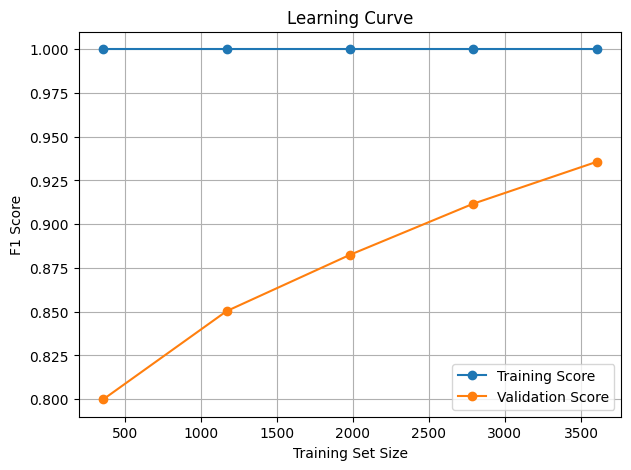

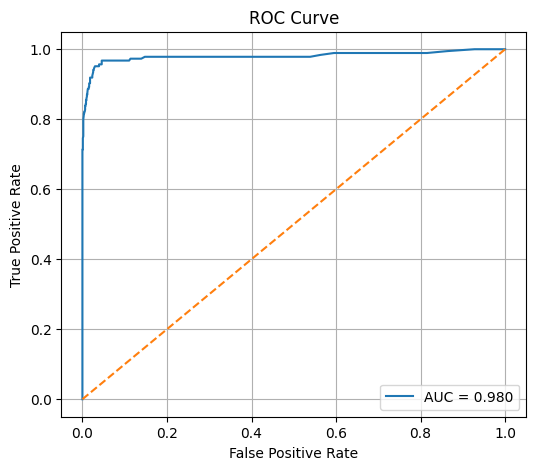

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=300, 
    max_depth=None,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42,
    class_weight='balanced'
)
results = train_test_model(
    rf_model,
    preprocessor,
    X_train,
    y_train,
    X_test,
    y_test
)

plot_confusion_matrix(results)
plot_train_test_metrics(results)
plot_learning_curve(results["model"], X_train, y_train)
# If binary classification
plot_roc_curve(results["model"], X_test, y_test)

# Saving The model

In [30]:
rf_model = RandomForestClassifier(
    n_estimators=300, 
    max_depth=None,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42,
    class_weight='balanced'
)

In [33]:
pipeline=Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("model",rf_model),
    ]
    
)

In [35]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('transform',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount...
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Device', 'PaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus',
       'Complain'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        max_features=None, n_estimators=300,
                                        random_state=42))])

In [38]:
y_test_pred = pipeline.predict(X_test)
y_train_pred=pipeline.predict(X_train)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Detailed classification report
report = classification_report(y_test, y_test_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

In [41]:
print("test accuracy of the model: ",accuracy)
print("test f1 score: ",f1)
print("classification report: ",report)
print("confusion matrix: ",cm)

test accuracy of the model:  0.9662522202486679
test f1 score:  0.9650281052989133
classification report:                precision    recall  f1-score   support

           0       0.96      1.00      0.98       941
           1       0.97      0.82      0.89       185

    accuracy                           0.97      1126
   macro avg       0.97      0.91      0.93      1126
weighted avg       0.97      0.97      0.97      1126

confusion matrix:  [[937   4]
 [ 34 151]]


In [42]:
import joblib

joblib.dump(pipeline, "churn_model_pipeline.pkl")


['churn_model_pipeline.pkl']